# "Shared heritage"
Management and integration of cultural heritage data across Arches-based platforms in the Global South


<center>

![](https://raw.githubusercontent.com/achp-project/cultural-heritage/main/www/logo.png)

Big Historical Data conference - Environments of big cultural heritage data integration <br><sup> 22-25 Nov 2023, Jena, Germany, Max Planck Institute of Geoanthropology, https://bhdc.earth/</sup>

</center>

| Thomas Huet              | Alan Tapscott            | Jonas Gregorio de Souza  | Junaid Abdul Jabbar      | Manoj Lokare             |
|--------------------------|--------------------------|--------------------------|--------------------------|--------------------------|
| University of Oxford     | Universitat Pompeu Fabra  | Universitat Pompeu Fabra  | University of Cambridge   | University of Cambridge   |
| prj EAMANE               | prj MAPHSA               | prj MAPHSA               | prj MASHA                | prj MAEASAM              |
| thomas.huet@arch.ox.ac.uk | alan.tapscott@upf.edu     | jonas.gregorio@upf.edu    | ja738@cam.ac.uk           | ml2098@cam.ac.uk          |

| Ash Smith                | Mike Fisher              | Mahmoud Abdelrazek       | Bryan Alvey              | Marco Nebbia             |
|--------------------------|--------------------------|--------------------------|--------------------------|--------------------------|
| University of Southampton | Max Planck Institute      | UCL                      | UCL Institute of Archaeology | UCL Institute of Archaeology |
| prj MaREA                | prj MAPSS                | prj MASHA and MAEASAM    | prj MAESAM               | prj MAPSHA                |
| ash.smith@soton.ac.uk     | michael.fisher@shh.mpg.de | mahmoud.abdelrazek@ucl.ac.uk | bryan.alvey@blueyonder.co.uk | m.nebbia@ucl.ac.uk        |



<font color='darkgrey'>
"Shared heritage" is the definition of the cultural heritage according to the World Heritage Convention in 1945. In the digital world it means only: what we are documenting? and how we made it interoperable?
* We are several university projects assessing cultural heritage in the Global South, over large continuous geographical areas, using the Arches information system
</font>

#### 🖥️ first..
> Load GitHub repository, requirements and libraries

In [1]:
# TODO: silent

# ACHP parser
!rm achp-functions -R
!git clone https://github.com/achp-project/achp-functions.git
!pip install  -q -r achp-functions/graph-parser/requirements.txt
%cd /content/achp-functions/graph-parser/
!rm inputResourceModels -R
!mkdir -p inputResourceModels
import graph_mixer as gm

# EAMENA erms
%cd /content/
!rm eamena-functions -R
!git clone https://github.com/eamena-project/eamena-functions.git
import mds

import os
import urllib.request
import pandas as pd
import ipywidgets as widgets
from ipywidgets import interact, interactive
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import re
from IPython.display import HTML
from IPython.display import IFrame
from pyvis import network as net
import folium
import json

Cloning into 'achp-functions'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 43 (delta 5), reused 39 (delta 4), pack-reused 0
Receiving objects: 100% (43/43), 639.79 KiB | 9.01 MiB/s, done.
Resolving deltas: 100% (5/5), done.
/content/achp-functions/graph-parser
rm: cannot remove 'inputResourceModels': No such file or directory


## Context

### Where

<font color='darkgrey'>
Global South, from East to the West (highligthed projects contributing to ACHP):
*   Mongolian Archaeology Project: Surveying the Steppes (MAPSS): : Mongolian steppes
*   Central Asian Archaeological Landscapes (CAAL): Eurasian steppes
*   Mapping Archaeological Heritage in South Asia (MAHSA)
*   Maldives Heritage Survey (MAHS): "Maldives", "Indonesia", "Vietnam"
*   Endangered Archaeology in the Middle East & North Africa / Maritime Endangered Archaeology (EAMENA / MAREA): North Africa and the Middle East
*   Mapping Africa's Endangered Sites and Monuments (MAEASAM): sub-Saharan Africa
*   Mapping Pre-Columbian Heritage in South America (MAPHSA): Amazon-Andes
</font>

In [2]:
gm.projects_extent()

### What

<font color='darkgrey'>
For our projects, it it mostly cultural heritage. For example EAMENA and MAESAM
</font>

In [25]:
IFrame('https://database.eamena.org/', width=1000, height=300)

In [26]:
IFrame('https://maeasam.org/', width=1000, height=300)

## Resource Models

Resource Models (RMs) are the models of any kind of resources. Like molds, they are not perfect. However, they allow copies to be shared.

![](https://www.musee-bartholdi.fr/sites/museebartholdi/files/styles/large/public/auguste_bartholdi/statue_liberte/liberte-colmar05_0.jpg)


List of available RMs:

In [3]:
# Download uploaded cultural heritage partners graphs
remote_source_files = gm.rm_list()
remote_source_files

{'MAPSS': 'https://raw.githubusercontent.com/achp-project/prj-mapss/main/pkg/graphs/Heritage%20Place%20(3).json',
 'MAHS': 'https://raw.githubusercontent.com/achp-project/prj-mahs/main/Site.json',
 'MAHSA': 'https://raw.githubusercontent.com/achp-project/prj-mahsa/main/resource-models/Heritage%20Location%20Resource%20Model.json',
 'MAEASAM': 'https://raw.githubusercontent.com/achp-project/prj-maeasam/main/Site.json',
 'EAMENA': 'https://raw.githubusercontent.com/achp-project/prj-eamena-marea/main/resource_models/Heritage%20Place.json'}

<font color='darkgrey'>
These files are JSON. Record CIDOC CRM based tables, relations and thesauru. We usualy hsoted them on GitHub
</font>

<https://github.com/achp-project/prj-mahsa/blob/main/resource-models/Heritage%20Location%20Resource%20Model.json#L5100-L5117>

Select two RMs to compare (checkboxes):

In [4]:
checkboxes_dict = gm.generate_checkboxes_from_dict(remote_source_files)
interactive_widget = interactive(gm.get_and_print_checked_values, **checkboxes_dict)
display(interactive_widget)

interactive(children=(Checkbox(value=False, description='MAPSS'), Checkbox(value=False, description='MAHS'), C…

Retrieve and show selected RM keys

In [5]:
gm.rm_selected(checkboxes_dict, remote_source_files)

Selected projects: ['MAHSA', 'EAMENA']
Selected RMs: {'MAHSA': 'https://raw.githubusercontent.com/achp-project/prj-mahsa/main/resource-models/Heritage%20Location%20Resource%20Model.json', 'EAMENA': 'https://raw.githubusercontent.com/achp-project/prj-eamena-marea/main/resource_models/Heritage%20Place.json'}


Create subgraph and comparison dataframe csv files by running [graph-parser.py](https://github.com/achp-project/cultural-heritage/blob/main/graph-parser/graph_parser.py) and [graph-comparator.py](https://github.com/achp-project/cultural-heritage/blob/main/graph-parser/graph_comparator.py)

In [9]:
!python /content/achp-functions/graph-parser/graph_comparator.py -d -m list -o subgraphMetrics.csv inputResourceModels/*.json
!python /content/achp-functions/graph-parser/graph_comparator.py -d -m compare -o comparisonMetrics.csv inputResourceModels/*.json
subgraph_metrics = pd.read_csv('subgraphMetrics.csv')
comparison_metrics = pd.read_csv('comparisonMetrics.csv')
subgraph_metrics = gm.subgraph_metrics()
comparison_metrics = gm.comparison_metrics()

In [ ]:
subgraph_metrics

In [ ]:
comparison_metrics

### Graph drawing



#### Individual graphs

In [ ]:
gm.plot_all_G(subgraph_metrics, comparison_metrics)

#### Combined graphs

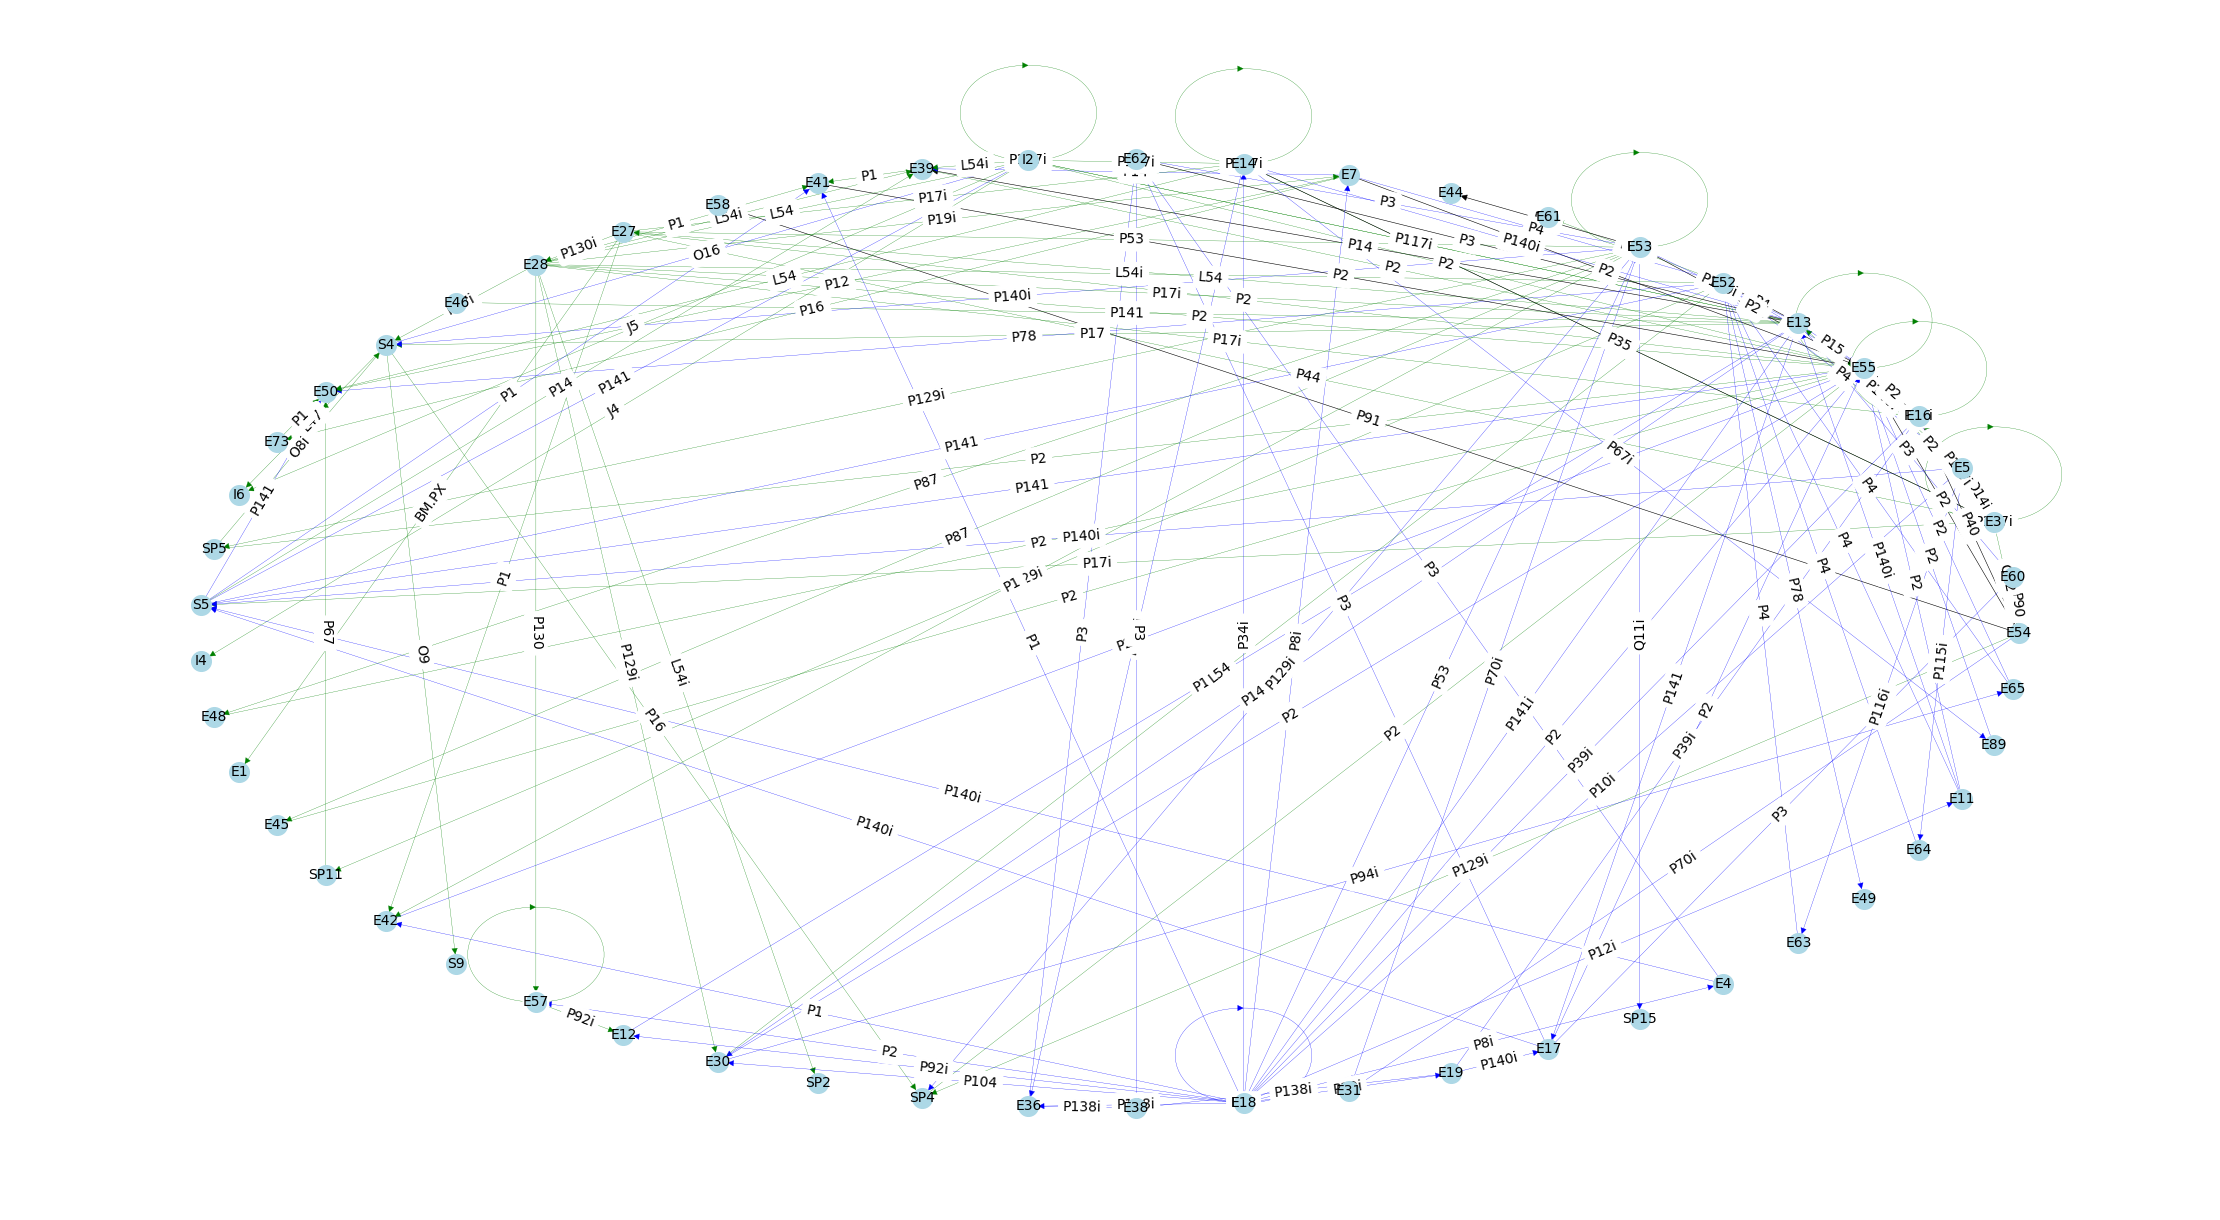

In [14]:
G = gm.all_nx_G(subgraph_metrics, comparison_metrics)
gm.plot_all_nx_G(G)

#### Interactive graphs

In [18]:
!pwd

/content/eamena-functions/mds


In [23]:
# %cd /content/eamena-functions/mds
%cd /content/achp-functions/graph-parser/
gm.rm_one_selected('EAMENA', remote_source_files)


!python /content/achp-functions/graph-parser/graph_comparator.py -d -m list -o subgraphMetrics.csv inputResourceModels/*.json
!python /content/achp-functions/graph-parser/graph_comparator.py -d -m list -o subgraphMetrics.csv inputResourceModels/*.json

subgraph_metrics = pd.read_csv('subgraphMetrics.csv')
rm_project= 'EAMENA'
filename = rm_project + ".html"
mds_template_df = mds.mds_template()
mds_template_df['Enhanced record minimum standard'] = mds_template_df['Enhanced record minimum standard'].str.contains(r'Yes', case = False, na = False, regex = True).astype(int)
mds_template_df = mds_template_df.loc[mds_template_df['Enhanced record minimum standard'] == 1]
in_erms = list(mds_template_df['uuid_sql'])
df_color = mds.mds_field_colors()
G = gm.create_rm_graph(rm_project= rm_project, color_fields = df_color)
hp_G = gm.plot_net_graph(G, filename = filename, width = "1200px", height = "1000px")
HTML(filename=filename)
# gm.plot_all_pyvis_G(G, "pyvis-example")

/content/achp-functions/graph-parser


## Perspectives

* RDF and SPARQL
* Persistancy
* narrow the digital gap between cultural heritage data managers, cultural heritage policies stakeholdrs, and the general public